# Complex Machine Learning Models and Keras Part 2 - Random Forest

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Random Forest Model
#### 6. Uncovering Feature Importances

## 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Define path
path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis\Data Sets'

In [6]:
# Import cleaned data
X = pd.read_csv(os.path.join(path, 'unscaled_cleaned_with_date.csv'), index_col = False)

In [7]:
# Read in the pleasant weather data
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [8]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [9]:
X.shape

(22950, 137)

In [10]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
pleasant.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to one decade 2010s (2010-2019).

In [13]:
# Filter weather dataset to 2010s
df_2010s = X[X['DATE'].astype(str).str.startswith('201')] 
df_2010s

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [14]:
# Filter weather dataset to 2010s
pleasant_2010s = pleasant[pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant_2010s

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Extract stations list
stations = [col.split('_')[0] for col in df_2010s.columns if '_' in col]

In [16]:
# Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [17]:
# Drop unnecessary columns
df_2010s.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [18]:
df_2010s.shape # dataset has the correct shape

(3652, 135)

In [19]:
# Drop unnecessary columns
pleasant_2010s.drop(columns = 'DATE', inplace = True)

In [20]:
pleasant_2010s.shape # dataset has the correct shape

(3652, 15)

## 3. Reshaping for modeling

In [22]:
X = df_2010s

In [23]:
y = pleasant_2010s

In [24]:
# Turn X and y from into arrays
X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(3652, 135)

In [26]:
y.shape

(3652, 15)

## 4. Data Split 

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 5. Random Forest Model

In [31]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5815991237677984


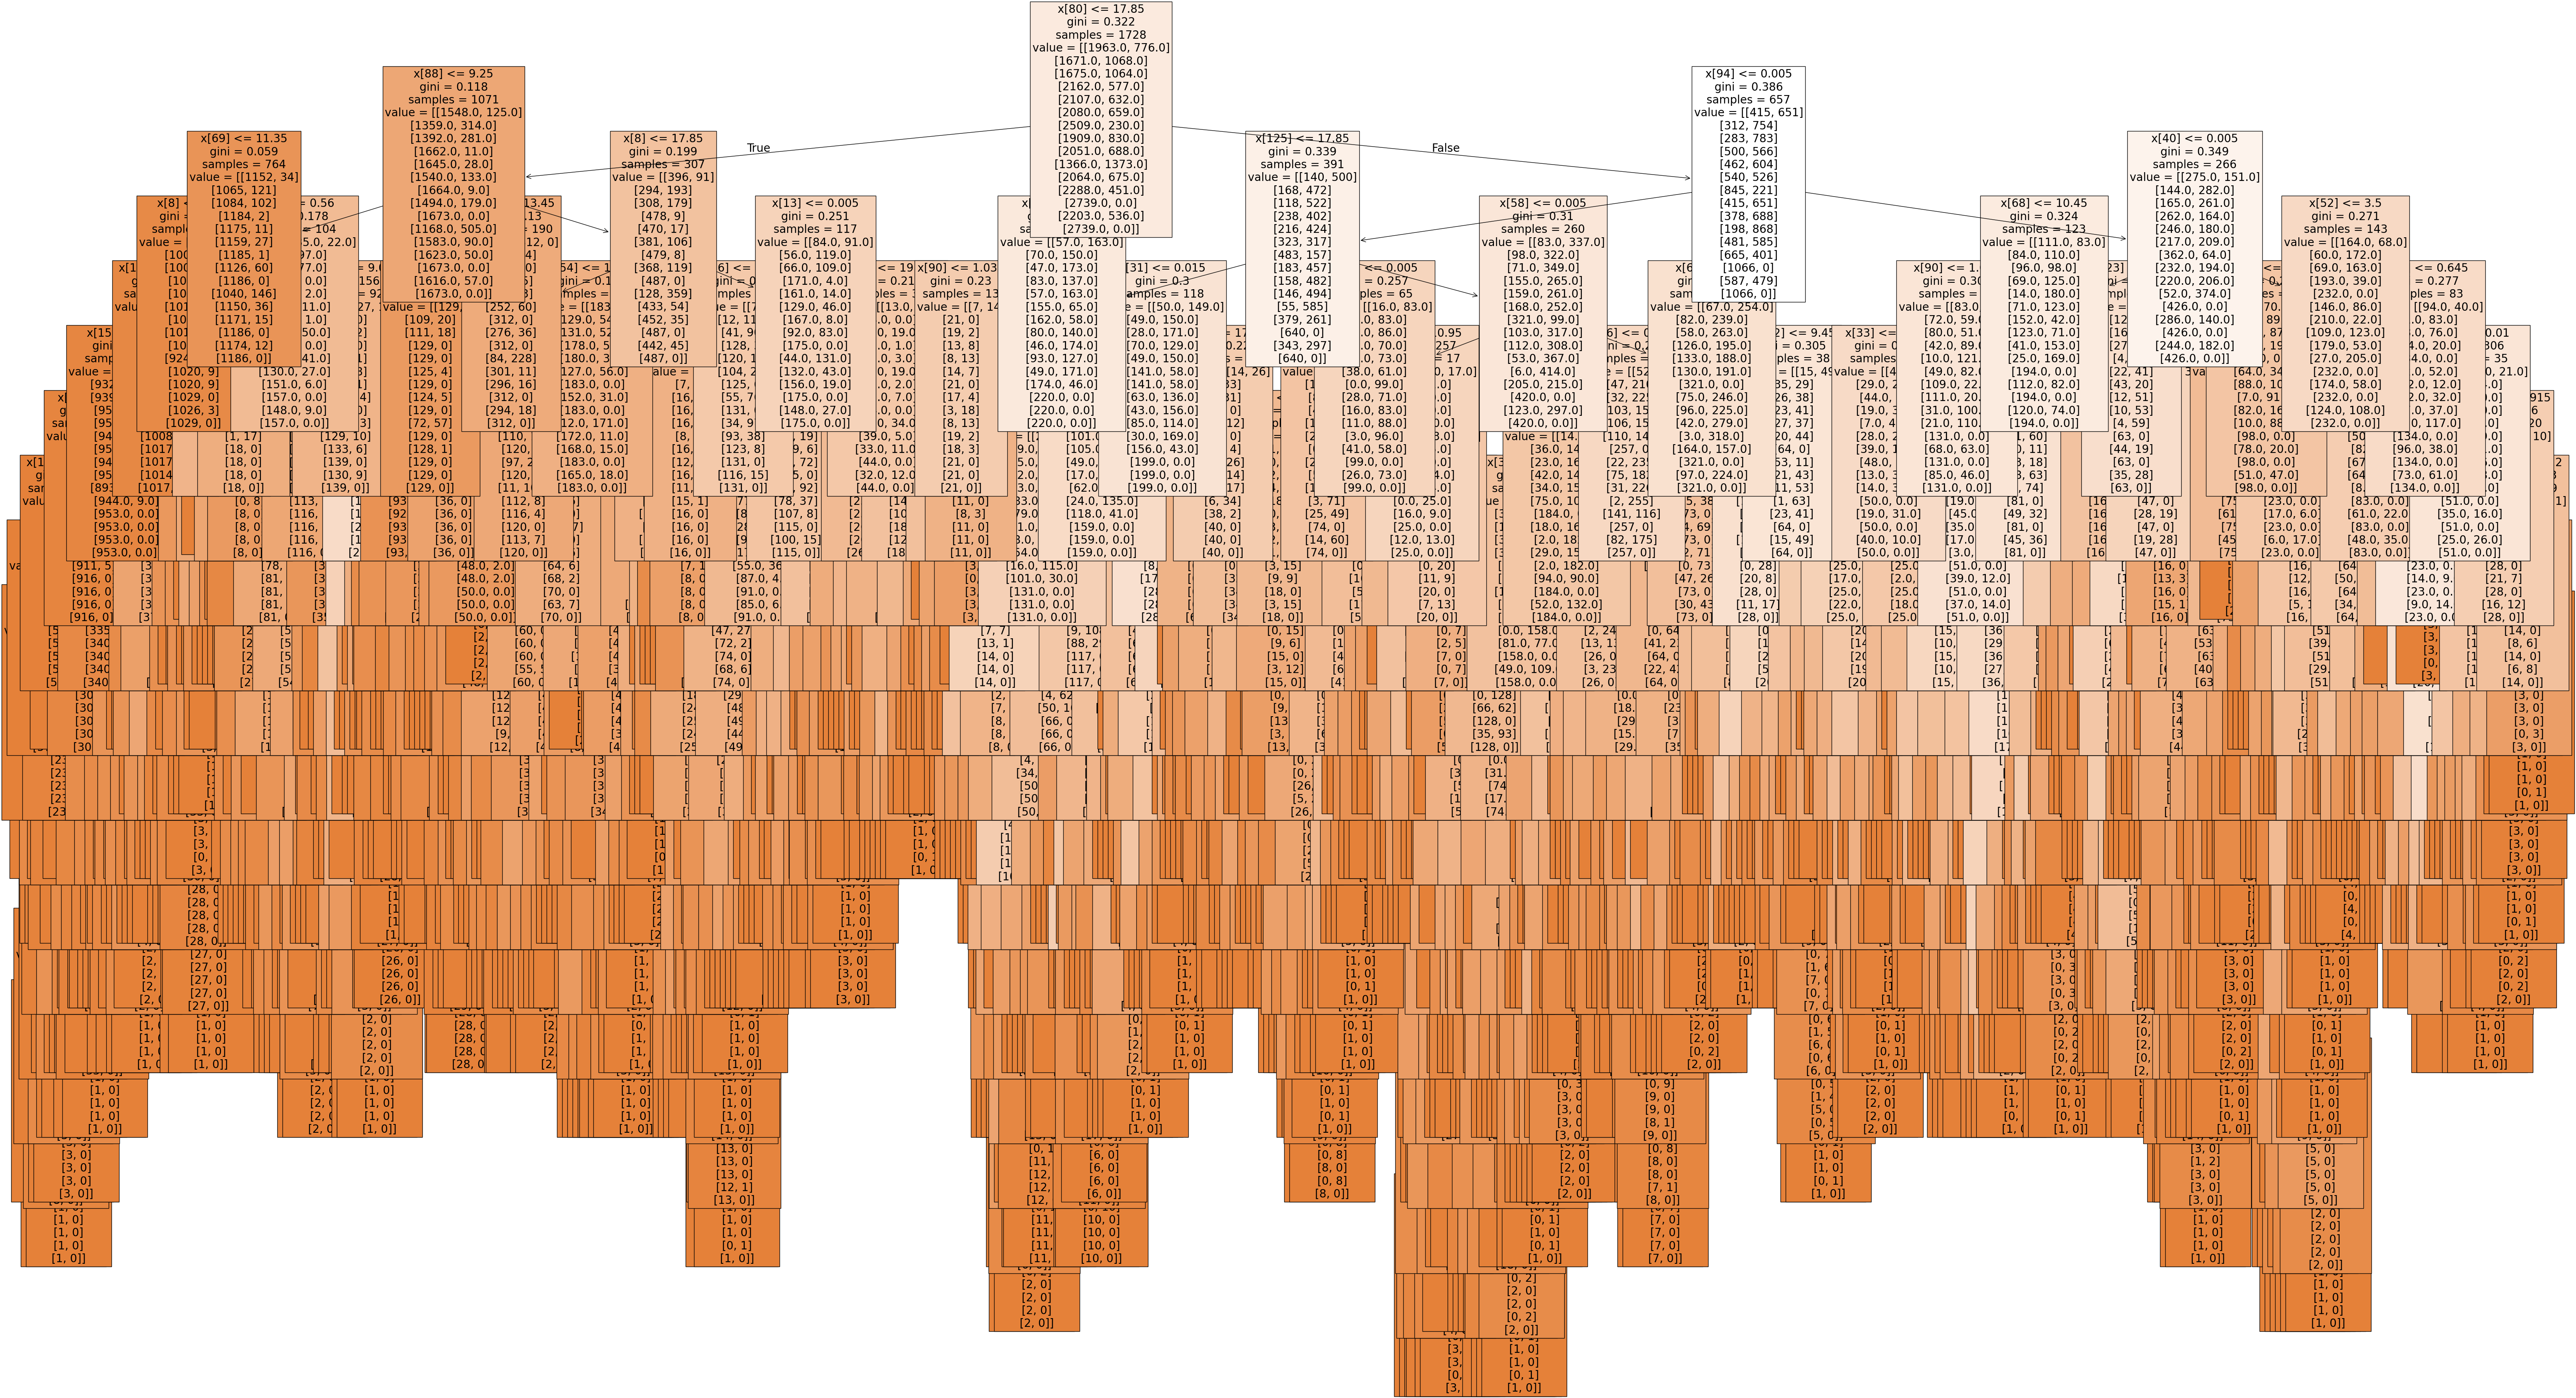

In [33]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [34]:
fig.savefig(os.path.join(path, 'random_forest_2010s.png'),bbox_inches='tight')

## 6. Uncovering Feature Importances

In [36]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([4.01911310e-03, 4.32391969e-03, 3.35556175e-03, 3.33343805e-03,
       2.00429268e-02, 8.90488943e-03, 1.43285244e-02, 7.80266484e-03,
       2.93015011e-02, 3.97442066e-03, 3.40505340e-03, 3.68782113e-03,
       2.79094680e-03, 1.52751875e-02, 3.17566522e-03, 5.64284360e-03,
       3.45158733e-03, 8.12069619e-03, 4.10734808e-04, 0.00000000e+00,
       0.00000000e+00, 1.12798093e-03, 1.50012254e-02, 1.78289149e-03,
       1.83358416e-02, 8.96531918e-03, 1.54970996e-02, 2.09565750e-03,
       2.94583166e-03, 4.77795059e-03, 3.95432103e-03, 1.60765450e-02,
       4.42129601e-03, 1.35397632e-02, 2.75004154e-03, 3.76312097e-02,
       2.78329526e-03, 3.58608318e-03, 4.14091843e-03, 4.06215223e-03,
       1.82838616e-02, 7.58530260e-03, 1.73008014e-02, 2.99527971e-03,
       5.23515450e-02, 2.63985882e-03, 4.27538737e-03, 4.03778101e-03,
       3.87506527e-03, 1.07559696e-02, 4.50261042e-03, 6.91976084e-03,
       4.18732232e-03, 3.26343498e-03, 1.46374250e-02, 2.75503180e-03,
      

In [37]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[4.01911310e-03, 4.32391969e-03, 3.35556175e-03, 3.33343805e-03,
         2.00429268e-02, 8.90488943e-03, 1.43285244e-02, 7.80266484e-03,
         2.93015011e-02],
        [3.97442066e-03, 3.40505340e-03, 3.68782113e-03, 2.79094680e-03,
         1.52751875e-02, 3.17566522e-03, 5.64284360e-03, 3.45158733e-03,
         8.12069619e-03],
        [4.10734808e-04, 0.00000000e+00, 0.00000000e+00, 1.12798093e-03,
         1.50012254e-02, 1.78289149e-03, 1.83358416e-02, 8.96531918e-03,
         1.54970996e-02],
        [2.09565750e-03, 2.94583166e-03, 4.77795059e-03, 3.95432103e-03,
         1.60765450e-02, 4.42129601e-03, 1.35397632e-02, 2.75004154e-03,
         3.76312097e-02],
        [2.78329526e-03, 3.58608318e-03, 4.14091843e-03, 4.06215223e-03,
         1.82838616e-02, 7.58530260e-03, 1.73008014e-02, 2.99527971e-03,
         5.23515450e-02],
        [2.63985882e-03, 4.27538737e-03, 4.03778101e-03, 3.87506527e-03,
         1.07559696e-02, 4.50261042e-03, 6.91976084e-03, 4.18732232

In [38]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09541254, 0.04952422, 0.06112109, 0.08819262, 0.11308924,
       0.04445719, 0.04134434, 0.08923514, 0.10709654, 0.07224902,
       0.0866514 , 0.05083347, 0.03106874, 0.06553478, 0.00418966])

In [39]:
# Convert the set of unique stations to a list
unique_stations_list = list(unique_stations)

In [40]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BELGRADE      0.113089
VALENTIA      0.107097
STOCKHOLM     0.095413
SONNBLICK     0.089235
MADRID        0.088193
KASSEL        0.086651
DUSSELDORF    0.072249
DEBILT        0.065535
OSLO          0.061121
MUNCHENB      0.050833
LJUBLJANA     0.049524
BUDAPEST      0.044457
MAASTRICHT    0.041344
BASEL         0.031069
HEATHROW      0.004190
dtype: float64

In [41]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['STOCKHOLM', 'LJUBLJANA', 'OSLO', 'MADRID', 'BELGRADE', 'BUDAPEST', 'MAASTRICHT', 'SONNBLICK', 'VALENTIA', 'DUSSELDORF', 'KASSEL', 'MUNCHENB', 'BASEL', 'DEBILT', 'HEATHROW']


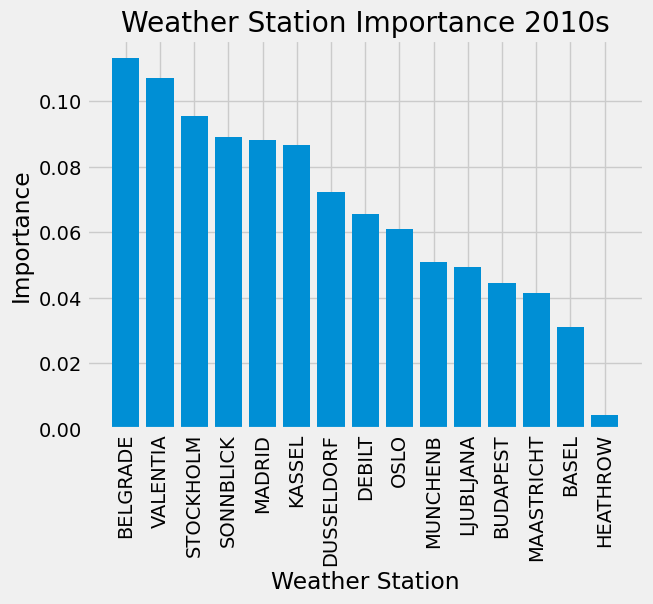

In [42]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, '2010s_feature_importances.png'), bbox_inches='tight')

plt.show()